In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [16]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | It is embarrassing to have th...
1,✅ Trip Verified | Flight cancelled due to bad ...
2,✅ Trip Verified | British Airways oversold my...
3,✅ Trip Verified | I travelled London to Doha ...
4,✅ Trip Verified | When dropping off my luggag...


In [17]:
df.to_csv("BA_reviews.csv")
df.head()

,reviews
0,Not Verified | It is embarrassing to have th...
1,✅ Trip Verified | Flight cancelled due to bad ...
2,✅ Trip Verified | British Airways oversold my...
3,✅ Trip Verified | I travelled London to Doha ...
4,✅ Trip Verified | When dropping off my luggag...


In [21]:
df['reviews'] = df['reviews'].str.replace(' ✅ Trip Verified', ' ')
print(df)

                                               reviews
0    Not Verified |   It is embarrassing to have th...
1    ✅ Trip Verified | Flight cancelled due to bad ...
2    ✅ Trip Verified |  British Airways oversold my...
3    ✅ Trip Verified |  I travelled London to Doha ...
4    ✅ Trip Verified |  When dropping off my luggag...
..                                                 ...
995  ✅ Trip Verified | Just checked in for a flight...
996  ✅ Trip Verified |  Gatwick to Madrid. When I a...
997  ✅ Trip Verified |  My boyfriend and I wanted t...
998  ✅ Trip Verified |  I had kept my laptop bag in...
999  ✅ Trip Verified |  London to Delhi. A truly fi...

[1000 rows x 1 columns]


In [22]:
df['reviews'] = df['reviews'].str.replace(' Not Verified', '')
print(df)

                                               reviews
0    Not Verified |   It is embarrassing to have th...
1    ✅ Trip Verified | Flight cancelled due to bad ...
2    ✅ Trip Verified |  British Airways oversold my...
3    ✅ Trip Verified |  I travelled London to Doha ...
4    ✅ Trip Verified |  When dropping off my luggag...
..                                                 ...
995  ✅ Trip Verified | Just checked in for a flight...
996  ✅ Trip Verified |  Gatwick to Madrid. When I a...
997  ✅ Trip Verified |  My boyfriend and I wanted t...
998  ✅ Trip Verified |  I had kept my laptop bag in...
999  ✅ Trip Verified |  London to Delhi. A truly fi...

[1000 rows x 1 columns]


In [23]:
df.to_csv("BA_reviews.csv")
df.head()

,reviews
0,Not Verified | It is embarrassing to have th...
1,✅ Trip Verified | Flight cancelled due to bad ...
2,✅ Trip Verified | British Airways oversold my...
3,✅ Trip Verified | I travelled London to Doha ...
4,✅ Trip Verified | When dropping off my luggag...


In [24]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [25]:
df

,reviews
0,It is embarrassing to have the word “Britis...
1,"Flight cancelled due to bad weather, BA conta..."
2,British Airways oversold my LHR to LAX fligh...
3,"I travelled London to Doha on July 16th, I h..."
4,When dropping off my luggage at the luggage ...
...,...
995,Just checked in for a flight from Newcastle w...
996,Gatwick to Madrid. When I arrived I waited f...
997,My boyfriend and I wanted to return from our...
998,I had kept my laptop bag in the overhead cab...


In [26]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,It is embarrassing to have the word “Britis...,It is embarrassing to have the word British a...
1,"Flight cancelled due to bad weather, BA conta...",Flight cancelled due to bad weather BA contac...
2,British Airways oversold my LHR to LAX fligh...,British Airways oversold my LHR to LAX flight...
3,"I travelled London to Doha on July 16th, I h...",I travelled London to Doha on July th I had t...
4,When dropping off my luggage at the luggage ...,When dropping off my luggage at the luggage d...


In [27]:
pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk

In [29]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...


In [30]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Divya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,It is embarrassing to have the word “Britis...,It is embarrassing to have the word British a...,"[(embarrassing, v), (word, n), (British, n), (..."
1,"Flight cancelled due to bad weather, BA conta...",Flight cancelled due to bad weather BA contac...,"[(Flight, n), (cancelled, v), (due, a), (bad, ..."
2,British Airways oversold my LHR to LAX fligh...,British Airways oversold my LHR to LAX flight...,"[(British, a), (Airways, n), (oversold, None),..."
3,"I travelled London to Doha on July 16th, I h...",I travelled London to Doha on July th I had t...,"[(travelled, v), (London, n), (Doha, v), (July..."
4,When dropping off my luggage at the luggage ...,When dropping off my luggage at the luggage d...,"[(dropping, v), (luggage, n), (luggage, n), (d..."


In [31]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,It is embarrassing to have the word “Britis...,It is embarrassing to have the word British a...,"[(embarrassing, v), (word, n), (British, n), (...",embarrass word British attach airline servic...
1,"Flight cancelled due to bad weather, BA conta...",Flight cancelled due to bad weather BA contac...,"[(Flight, n), (cancelled, v), (due, a), (bad, ...",Flight cancel due bad weather BA contact ema...
2,British Airways oversold my LHR to LAX fligh...,British Airways oversold my LHR to LAX flight...,"[(British, a), (Airways, n), (oversold, None),...",British Airways oversold LHR LAX flight book...
3,"I travelled London to Doha on July 16th, I h...",I travelled London to Doha on July th I had t...,"[(travelled, v), (London, n), (Doha, v), (July...",travel London Doha July th physically check ...
4,When dropping off my luggage at the luggage ...,When dropping off my luggage at the luggage d...,"[(dropping, v), (luggage, n), (luggage, n), (d...",drop luggage luggage drop Toulouse airport t...


In [32]:
df[['reviews','Lemma']]


,reviews,Lemma
0,It is embarrassing to have the word “Britis...,embarrass word British attach airline servic...
1,"Flight cancelled due to bad weather, BA conta...",Flight cancel due bad weather BA contact ema...
2,British Airways oversold my LHR to LAX fligh...,British Airways oversold LHR LAX flight book...
3,"I travelled London to Doha on July 16th, I h...",travel London Doha July th physically check ...
4,When dropping off my luggage at the luggage ...,drop luggage luggage drop Toulouse airport t...
...,...,...
995,Just checked in for a flight from Newcastle w...,check flight Newcastle BA check process disg...
996,Gatwick to Madrid. When I arrived I waited f...,Gatwick Madrid arrive wait one half hour one...
997,My boyfriend and I wanted to return from our...,boyfriend want return trip London day early ...
998,I had kept my laptop bag in the overhead cab...,keep laptop bag overhead cabin Somebody get ...


In [33]:
!pip install vaderSentiment



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 330.3 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 469.7 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 656.4 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 672.7 kB/s eta 0:00:00


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,It is embarrassing to have the word “Britis...,It is embarrassing to have the word British a...,"[(embarrassing, v), (word, n), (British, n), (...",embarrass word British attach airline servic...,0.0000,Neutral
1,"Flight cancelled due to bad weather, BA conta...",Flight cancelled due to bad weather BA contac...,"[(Flight, n), (cancelled, v), (due, a), (bad, ...",Flight cancel due bad weather BA contact ema...,0.4215,Neutral
2,British Airways oversold my LHR to LAX fligh...,British Airways oversold my LHR to LAX flight...,"[(British, a), (Airways, n), (oversold, None),...",British Airways oversold LHR LAX flight book...,-0.9587,Negative
3,"I travelled London to Doha on July 16th, I h...",I travelled London to Doha on July th I had t...,"[(travelled, v), (London, n), (Doha, v), (July...",travel London Doha July th physically check ...,0.9456,Positive
4,When dropping off my luggage at the luggage ...,When dropping off my luggage at the luggage d...,"[(dropping, v), (luggage, n), (luggage, n), (d...",drop luggage luggage drop Toulouse airport t...,0.9337,Positive


In [35]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    468
Negative    421
Neutral     111
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20af0f8ecc0>,
 [Text(0.11039790437095814, 1.0944461168602595, 'Positive'),
  Text(-0.4777168749993115, -0.990851445647072, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.06021703874779535, 0.5969706091965051, '46.8%'),
  Text(-0.2605728409087153, -0.5404644248984029, '42.1%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

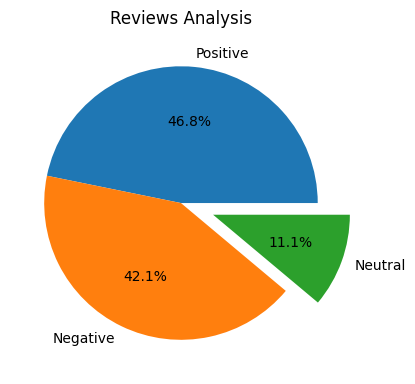

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [37]:
df.to_csv("BA_reviews.csv")


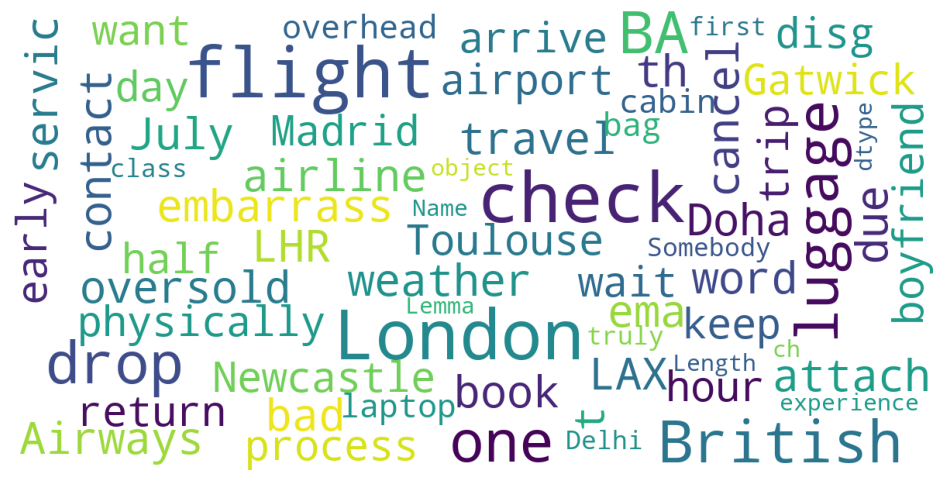

In [38]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)